In [17]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [18]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape #örnek ve özellik sayısını tuple olarak döndürür
        self._classes = np.unique(y) #veri setindeki farklı sınıfları tutar
        n_classes = len(self._classes)

        #her bir verinin ortalamasını, varyansını ve prior olasılığı için boş matris oluşturulur
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        #her bir sınıfın posterior olasılığı hesaplanır
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        #her bir sınıf için posterior olasılık hesaplanır
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)] #en olası sınıf döndürülür

    #verinin belli bir sınıfa ait olma olasılığı hesaplanır
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

Accuracy: 0.7975
Training Time: 0.001003 seconds
Prediction Time: 0.036363 seconds


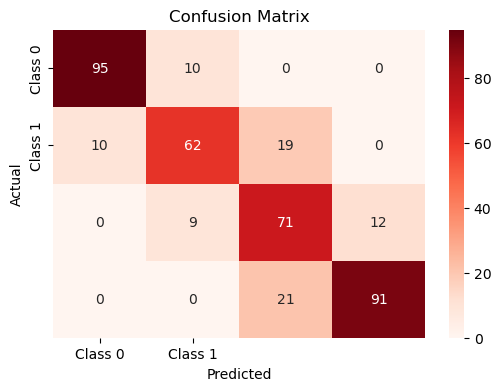

In [19]:
df = pd.read_csv(r"C:\Users\FURKAN\Downloads\archive (5)\train.csv") #veri seti

X = df.iloc[:, :-1].values #son sütun hariç tüm sütunlar
y = df.iloc[:, -1].values #son sütun (classification)

#veri setini %80 train %20 test olarak ayırır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bayesModel = NaiveBayes()

start_time = time.time()
bayesModel.fit(X_train, y_train) #modeli eğitir
fit_time = time.time() - start_time #train süresini ölçer

start_time = time.time()
y_pred = bayesModel.predict(X_test) #modeli test eder
predict_time = time.time() - start_time #test süresini ölçer

accuracy = accuracy_score(y_test, y_pred) #modelin doğruluğunu ölçer
conf_matrix = confusion_matrix(y_test, y_pred) #karmaşıklık matrisini oluşturur

print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {fit_time:.6f} seconds")
print(f"Prediction Time: {predict_time:.6f} seconds")

#karmaşıklık matrisini çizer
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()